In [5]:
#Autism rate

In [192]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [230]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve

In [33]:
import arff, numpy as np
dataset = arff.load(open('C:\\courses\\data\\Autism-Screening-Child-Data Plus Description\\Autism-Child-Data.arff'))
data = np.array(dataset['data'])

In [34]:
data

array([['1', '1', '0', ..., '4-11 years', 'Parent', 'NO'],
       ['1', '1', '0', ..., '4-11 years', 'Parent', 'NO'],
       ['1', '1', '0', ..., '4-11 years', None, 'NO'],
       ...,
       ['1', '0', '1', ..., '4-11 years', 'Parent', 'YES'],
       ['1', '1', '1', ..., '4-11 years', 'Parent', 'YES'],
       ['0', '0', '1', ..., '4-11 years', 'Parent', 'NO']], dtype=object)

In [167]:
df=pd.DataFrame(data)

Age
Gender 
Ethnicity
Born with jaundice
Family member with PDD
Who is completing the test
Country of residence
Used the screening app before
Screening Method Type(0=toddler, 1=child, 2= adolescent, 3= adult)
Question 1
Question 2
Question 3
Question 4
Question 5
Question 6
Question 7
Question 8
Question 9
Question 10
Screening Score


In [168]:
colmns=['Index','Question1','Question2','Question3','Question4','Question5','Question6','Question7','Question8'
 ,'Question9','Question10','Gender','Ethnicity','BornJaundice','FamilyMemberPDD','CountryOfResidence','UsedScreeningApp'
 ,'ScreeningScore','Age','WhoisAnswering','IsAutistic']

In [169]:
df.columns=colmns

In [170]:
df

,Index,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,...,Gender,Ethnicity,BornJaundice,FamilyMemberPDD,CountryOfResidence,UsedScreeningApp,ScreeningScore,Age,WhoisAnswering,IsAutistic
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,None,no,no,Jordan,yes,5,4-11 years,None,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,None,yes,no,Jordan,no,4,4-11 years,None,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES
5,0,0,1,0,1,1,0,1,0,1,...,m,None,no,yes,Egypt,no,5,4-11 years,None,NO
6,1,0,1,1,1,1,0,1,0,1,...,m,White-European,no,no,United Kingdom,no,7,4-11 years,Parent,YES
7,1,1,1,1,1,1,1,1,0,0,...,f,Middle Eastern,no,no,Bahrain,no,8,4-11 years,Parent,YES
8,1,1,1,1,1,1,1,0,0,0,...,f,Middle Eastern,no,no,Bahrain,no,7,4-11 years,Parent,YES
9,0,0,1,1,1,0,1,1,0,0,...,f,None,no,yes,Austria,no,5,4-11 years,None,NO


In [171]:
df.Ethnicity.unique()

array(['Others', 'Middle Eastern ', None, 'White-European', 'Black',
       'South Asian', 'Asian', 'Pasifika', 'Hispanic', 'Turkish',
       'Latino'], dtype=object)

In [172]:
df.Age.unique()

array(['4-11 years'], dtype=object)

In [173]:
df.drop(['Age','WhoisAnswering','UsedScreeningApp'],inplace=True,axis=1)
#df.drop?

In [174]:
df.head()

,Index,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,Gender,Ethnicity,BornJaundice,FamilyMemberPDD,CountryOfResidence,ScreeningScore,IsAutistic
0,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,5,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,Middle Eastern,no,no,Jordan,5,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,None,no,no,Jordan,5,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,None,yes,no,Jordan,4,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,United States,10,YES


In [175]:
temp=pd.Categorical(df.CountryOfResidence)

In [176]:
temp.codes

array([24, 24, 24, 24, 51, 13, 50,  5,  5,  4, 50, 25, 51, 49, 14, 30,  9,
       51, 51, 13, 43, 13, 18, 18, 13, 50,  0, 51, 49, 15, 50, 34, 13, 18,
       18, 46, 46, 34, 50, 18, 24,  0, 24, 24, 24, 19, 19, 24, 34, 24, 24,
       18, 24, 51, 49,  3, 42, 15,  2, 51, 47, 51,  3, 37, 51, 24, 50, 50,
       37, 10, 36, 50, 18, 10, 10, 50, 10, 34,  8, 34, 34, 34, 51, 44, 18,
       50, 50, 43, 12, 51,  3, 50, 18, 18, 51, 51, 45,  3, 51, 51, 50, 38,
       50, 51, 29, 38, 50, 50,  1, 23, 46, 51, 51,  3, 18, 18, 51, 51,  6,
        6,  6, 51, 50, 39, 20, 18, 24, 50, 18, 51, 34, 34, 50, 10, 50, 40,
       50, 51, 39, 50,  3, 33, 18, 18, 50, 51, 27, 16, 18, 26, 42, 51, 51,
       51, 34, 50, 50, 50, 50, 50, 24,  3, 50, 51, 18,  3, 49,  3, 41,  4,
       22,  3,  3, 50, 39, 50, 50, 50,  6,  6, 11, 37, 51,  3, 18, 50, 51,
       35, 50,  3, 27,  2, 51, 50, 19, 48,  3, 34, 18,  3,  3, 50, 18, 18,
       50, 50, 32, 50,  6, 31, 31, 51, 29, 50, 18, 51,  3, 47, 50, 51, 51,
       51, 51, 51, 10, 50

In [177]:
# let's try categorical
columns_to_encode = ['Gender','Ethnicity', 'BornJaundice', 'FamilyMemberPDD', 'CountryOfResidence']
for clm in columns_to_encode:
    temp1=pd.Categorical(df[clm])
    print(temp1.codes)
    df[clm]=temp1.codes
#np.testing.assert_array_equal(columns_to_encode, df.loc[:, columns_to_encode].columns)

#dummies = pd.get_dummies(df.loc[:, columns_to_encode])
#dummies.columns

[1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0
 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1
 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0]
[ 5  4 -1 -1  5 -1  9  4  4 -1  9 -1  9  1  9  9  7  5  9 -1  9 -1  0  7
 -1  9  4  9 -1  5  9  6 -1  7  7  4 -1  0  9  0 -1  4  4 -1  4  4  4 -1
  9  4 -1  0 -1  9 -1  9 -1  9  4  2  8  9  9  0  4  4  9  9 -1  9  0  9
  7  4  4  9  5  9  3  9  9  9  9  0  0  9  9  9  3  2  9  9  0  0  3  2
  9  9  9  9  9  0  9  5  0  0  9  9  0  0 -1  9  9  9  7  0  0  9  0  0
  0  9  9 -1  9  0 -1  0  0  9  9  9  9  1

In [178]:
for clm in df.columns:
    print(clm)
    print(df[clm].unique())
    print()

Index
['1' '0']

Question1
['1' '0']

Question2
['0' '1']

Question3
['0' '1']

Question4
['1' '0']

Question5
['1' '0']

Question6
['0' '1']

Question7
['1' '0']

Question8
['0' '1']

Question9
['0' '1']

Question10
[6.0 5.0 4.0 11.0 10.0 8.0 7.0 9.0 None]

Gender
[1 0]

Ethnicity
[ 5  4 -1  9  1  7  0  6  2  8  3]

BornJaundice
[0 1]

FamilyMemberPDD
[0 1]

CountryOfResidence
[24 51 13 50  5  4 25 49 14 30  9 43 18  0 15 34 46 19  3 42  2 47 37 10
 36  8 44 12 45 38 29  1 23  6 39 20 40 33 27 16 26 41 22 11 35 48 32 31
 21 28 17  7]

ScreeningScore
[5.0 4.0 10.0 7.0 8.0 3.0 9.0 2.0 1.0 6.0 0.0]

IsAutistic
['NO' 'YES']



In [182]:
df.Question10.unique()

array([ 6.,  5.,  4., 11., 10.,  8.,  7.,  9.,  0.])

In [152]:
i=0
for val in df.Question10:
    if(val=='nan'):
        print('Caught you' , i)
    i+=1

In [113]:
df[df.Question10.values==None].Question10

Series([], Name: Question10, dtype: float64)

In [179]:
#df.Question10.replace('nan','1.0',inplace=True)
df.Question10.fillna(value=pd.np.nan, inplace=True)

In [181]:
df.Question10.fillna(0,inplace=True)

In [282]:
X = df.loc[:, ['Gender']]
y = df.ScreeningScore

X.columns

Index(['Gender'], dtype='object')

In [267]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
print('Before:', X.shape, 'After:', X_2d.shape)

Before: (292, 2) After: (292, 2)


<IPython.core.display.Javascript object>


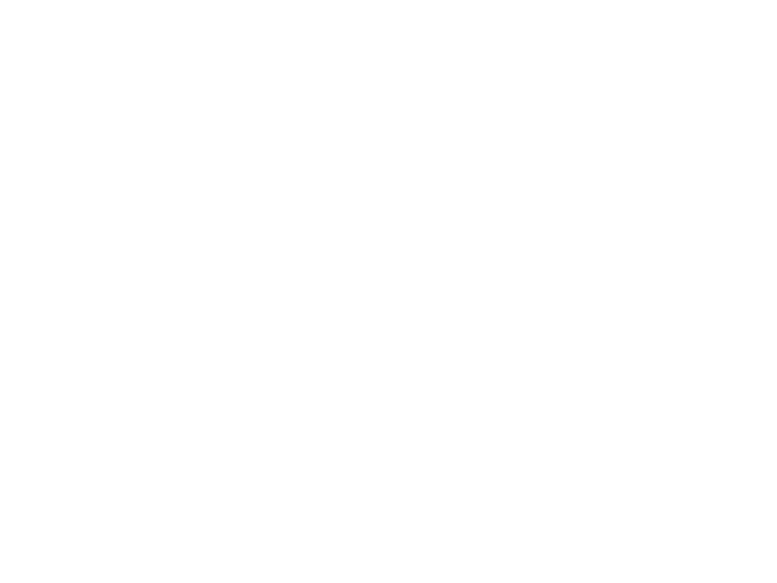

<IPython.core.display.Javascript object>


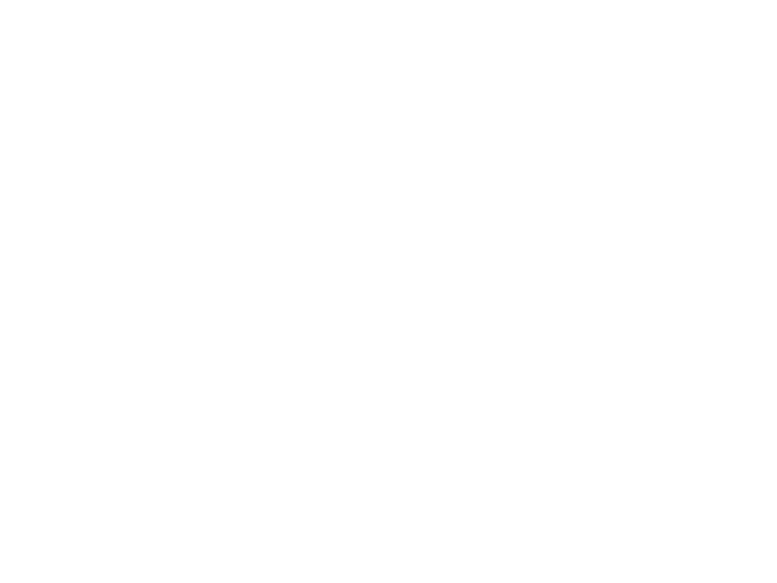

In [269]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig)

ax.scatter(X_2d[:,0],X_2d[:,1])

In [279]:
X1 = df.loc[:, ['Gender']]
y1 = df.ScreeningScore

X1.columns

Index(['Gender'], dtype='object')

In [280]:
pca_1d = PCA(n_components=1)
X_1d = pca_1d.fit_transform(X1)
print('Before:', X1.shape, 'After:', X_1d.shape)

Before: (292, 1) After: (292, 1)


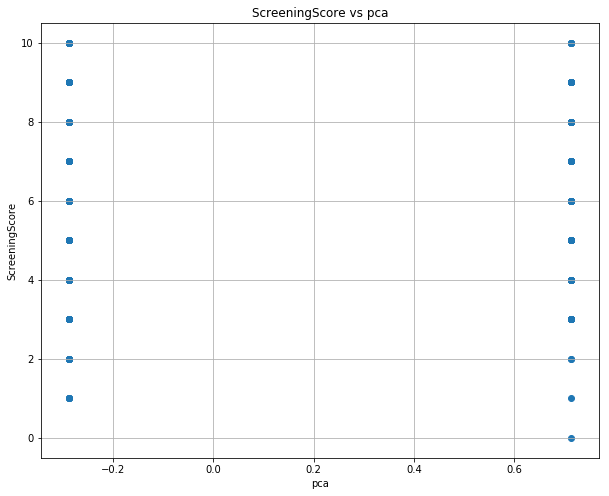

In [281]:
# switch back to non-interactive (this is just a matter of taste)
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 8))

# scatter plot of X_1d and mpg.
#ax.scatter(df.index,X_1d)
ax.scatter(X_1d,df['ScreeningScore'])
ax.set(xlabel='pca', ylabel='ScreeningScore')
ax.set(title = 'ScreeningScore vs pca')
ax.grid()

plt.show()

# 3. Shuffle data and split into training and test sets 

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [283]:
# we'll split the unscaled features
# then scale them using just the mean & variance of the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [284]:
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [285]:
y_train

68      5
209     6
37      2
16      9
289     7
140     8
264     8
67      4
215    10
126     7
137     0
111     3
208     3
152     6
18      8
259     8
86      7
230     8
92      8
97      8
108     4
228     4
55      2
185     6
272     3
38     10
179     7
170     5
57      9
116     9
       ..
279     9
243     3
54      5
50      4
174     5
189     9
187    10
169     9
58      8
48      7
235     6
252     7
21      5
160     7
191     7
257    10
149     3
130     9
151     7
99      2
87     10
214     6
121     5
291     3
20      8
188     6
71      4
106     8
270     7
102     2
Name: ScreeningScore, Length: 219, dtype: object

# Training

In [286]:
y_train = y_train.values

In [287]:
y_train=y_train.astype('int')

In [288]:
y_test=y_test.astype('int')

In [289]:
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train_scaled, y_train)
y_pred_logistic = logistic.predict(X_test_scaled)

In [290]:
sgd = SGDClassifier(tol=1e-4, max_iter=1000, verbose=True, random_state=42)
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)

-- Epoch 1
Norm: 5.51, NNZs: 1, Bias: -11.192694, T: 219, Avg. loss: 0.153905
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.67, NNZs: 1, Bias: -11.096083, T: 438, Avg. loss: 0.116215
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.05, NNZs: 1, Bias: -11.083507, T: 657, Avg. loss: 0.104297
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.58, NNZs: 1, Bias: -11.074415, T: 876, Avg. loss: 0.090054
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.20, NNZs: 1, Bias: -11.072082, T: 1095, Avg. loss: 0.080165
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.90, NNZs: 1, Bias: -11.069896, T: 1314, Avg. loss: 0.077906
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.65, NNZs: 1, Bias: -11.066435, T: 1533, Avg. loss: 0.070297
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.44, NNZs: 1, Bias: -11.061016, T: 1752, Avg. loss: 0.063232
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.26, NNZs: 1, Bias: -11.059816, T: 1971, Avg. loss: 0.060083
Total trainin

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished


In [291]:
# Classification report. See classification.ipynb for details
print(classification_report(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_sgd))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00         2
          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00        12
          5       0.00      0.00      0.00         9
          6       0.00      0.00      0.00        14
          7       0.16      0.90      0.27        10
          8       0.19      0.27      0.22        11
          9       0.00      0.00      0.00         4
         10       0.00      0.00      0.00         5

avg / total       0.05      0.16      0.07        73

             precision    recall  f1-score   support

          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00         2
          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00        12
          5       0.00      0.00      0.00         9
          6       0.00      0.00      0.00

C:\Users\prith\AppData\Local\Continuum\anaconda3\envs\mldds02\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
